<a href="https://colab.research.google.com/github/carefreecherry/Practice_ML/blob/main/DL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [31]:
x, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)  #noise = random spread of data #factor = gap between circle #random_state = same data set everytime running

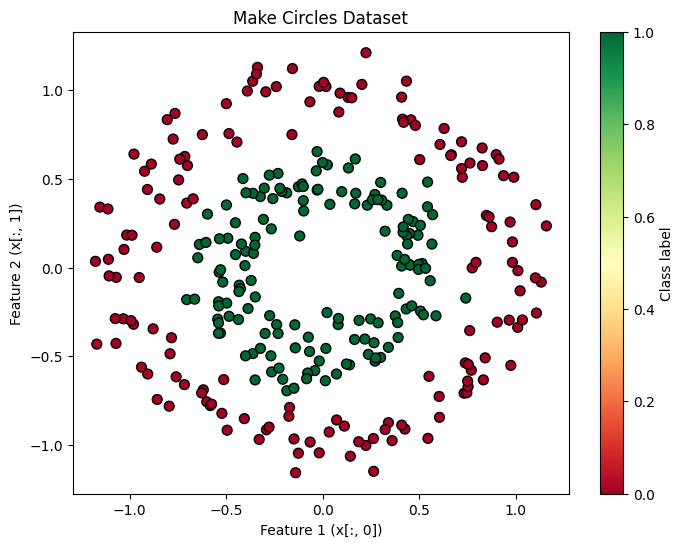

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1 (x[:, 0])')
plt.ylabel('Feature 2 (x[:, 1])')
plt.title('Make Circles Dataset')
plt.colorbar(label='Class label')
plt.show()

In [34]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

In [39]:
def update_plot(hidden_layer_size):
  #create MLP classifier
  clf=MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation= 'relu', max_iter=3000, random_state=1)

  #fit data to classifier
  clf.fit(x,y)

  #Making a grid
  #These are 1D arrays of 100 values each, representing the x and y coordinates of the grid.
  x_vals = np.linspace(x[:, 0].min() - 0.1, x[:, 0].max() + 0.1, 100)
  y_vals = np.linspace(x[:, 1].min() - 0.1, x[:, 1].max() + 0.1, 100)

  x_plane, y_plane = np.meshgrid(x_vals, y_vals)

  #making 2D grid to 1D (x,y) pair array
  grid_points= np.column_stack((x_plane.ravel(), y_plane.ravel()))

  #predicting to visulize decision boundary
  z = clf.predict(grid_points)

  #Reshape the predictions to match the grid shape
  z = z.reshape(x_plane.shape)

  #prediction of label for original datapoint
  y_predict = clf.predict(x)

  #clear previous plot
  plt.clf()

  #FIll the decision region
  plt.contourf(x_plane, y_plane, z, levels= [-0.5, 0.5, 1.5], cmap=plt.cm.RdYlGn, alpha=0.6)

  class_0 = y_predict == 0 #Indices of points predicted as class 0
  class_1 = y_predict == 1 #Indices of points predicted as class 1

  #plot actual data pediction
  plt.scatter(x[class_0, 0], x[class_0, 1], c='red', edgecolors='k', marker='o', s=50, label='Predicted Class 0')
  plt.scatter(x[class_1, 0], x[class_1, 1], c='green', edgecolors='k', marker='o', s=50, label='Predicted Class 1')

  #Add Labels and title
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title(f'Decision Boundary and Predicted Labels (Hidden Layer Size= (hidden_layer_size))')
  plt.legend()
  plt.show()

#Create a slider for hidden layer size
hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=20, step=1, description="Hidden Layer Size")

#Create an interactive widget
interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)

#Display the widgets
display(interactive_plot)

interactive(children=(IntSlider(value=1, description='Hidden Layer Size', max=20, min=1), Output()), _dom_clas…